<a href="https://colab.research.google.com/github/Kaavya-SK/Real-Estate-Prediction/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df1 = pd.read_csv("/content/sample_data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape #return rows and columns

(13320, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
df1.drop(['area_type','availability','society','balcony'],axis='columns',inplace=True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


**Now let's start with the data cleaning process**

In [ ]:
df1.isnull().sum()
# isnull is used to find the columns that has null .sum() -> calculate the no of rows in that column with null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

here i dropped the null rows since we have 13320 dropping these rows will not affect the dataset

In [ ]:
df1 = df1.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:

df1['size'].unique()
#non uniform datas are present

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:

df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.head()
df1.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

clean the squarefeet data column

In [ ]:
df1.total_sqft.unique()
# '1133 - 1384' these values are all range, so take average

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [ ]:
df1[~df1['total_sqft'].apply(is_float)]
# returns all the rows where total sqft is not float

NameError: name 'df1' is not defined

In [ ]:
def convert_sqft_to_float(x):
  token = x.split('-')
  if len(token) == 2:
    return (float(token[0])+float(token[1]))/2
  try:
    return float(x)
  except:
    return None


In [ ]:

convert_sqft_to_float('1000-2000')

1500.0

In [ ]:

df2 = df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_float)
df2.head()
#df2[~df2.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Now lets do some feature selection or feature engineering

In [ ]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(df3['location'].unique())

1304

Here we have large no of text data, if we use one-hot encoding then we'll have 1000+ rows, this type of issue is known as **Dimensionality curse**

In [ ]:
df3.location = df3.location.apply(lambda x: x.strip()) # -> removes leading space

#find no of data points per location

location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

Now let us set a threshold of 10 and the locations that has less than 10 data points are put into general Other category

In [ ]:
less_than_10 = location_stats[location_stats<=10]

In [ ]:
df3.location = df3.location.apply(lambda x: 'other' if x in less_than_10 else x)
len(df3.location.unique())

242

In [ ]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier(Errors) Detection and Removal

In [ ]:
df4 = df3[df3.total_sqft/df3.BHK<300]
df4.head()
#These values are the outliers

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#find mean and standard deviation per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df4.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [ ]:
df5 = remove_pps_outliers(df4)
df5.shape

(10241, 7)

In [ ]:
# visualization to find the outlier

In [ ]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.BHK==2)]
  bhk3 = df[(df.location==location) & (df.BHK==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3BHK',s=50)
  plt.xlabel('Total square  feet area')
  plt.ylabel('price per square feet')
  plt.title(location)
  plt.legend()

plot_scatter_chart(df5,'Rajaji Nagar')

NameError: name 'df5' is not defined

***Here at some cases the price of 2bhk is higher than 3 bhk even in the same loation, so we have to remove these outliers***

calculate the mean , std, count for all 2bhk and if the price of 3bhk is less than the mean of 2 bhk then remove the outlier

In [ ]:
def remove_bhk_outlier(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    #location - > gives the location
    #location_df -> gives the entire df of that particular location

    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('BHK'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }

    for bhk,bhk_df in location_df.groupby('BHK'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

  return df.drop(exclude_indices,axis='index')

df6 = remove_bhk_outlier(df5)

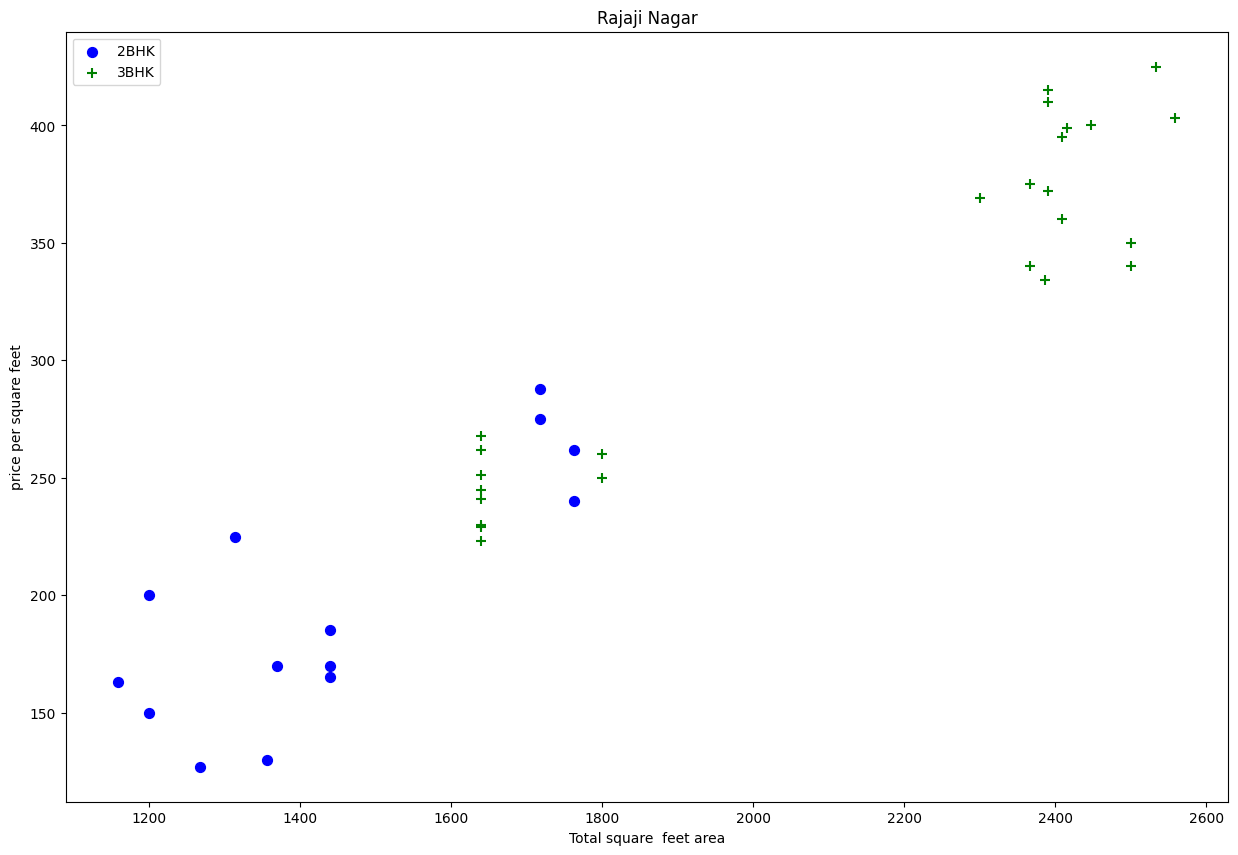

In [ ]:
plot_scatter_chart(df6,'Rajaji Nagar')

Text(0, 0.5, 'count')

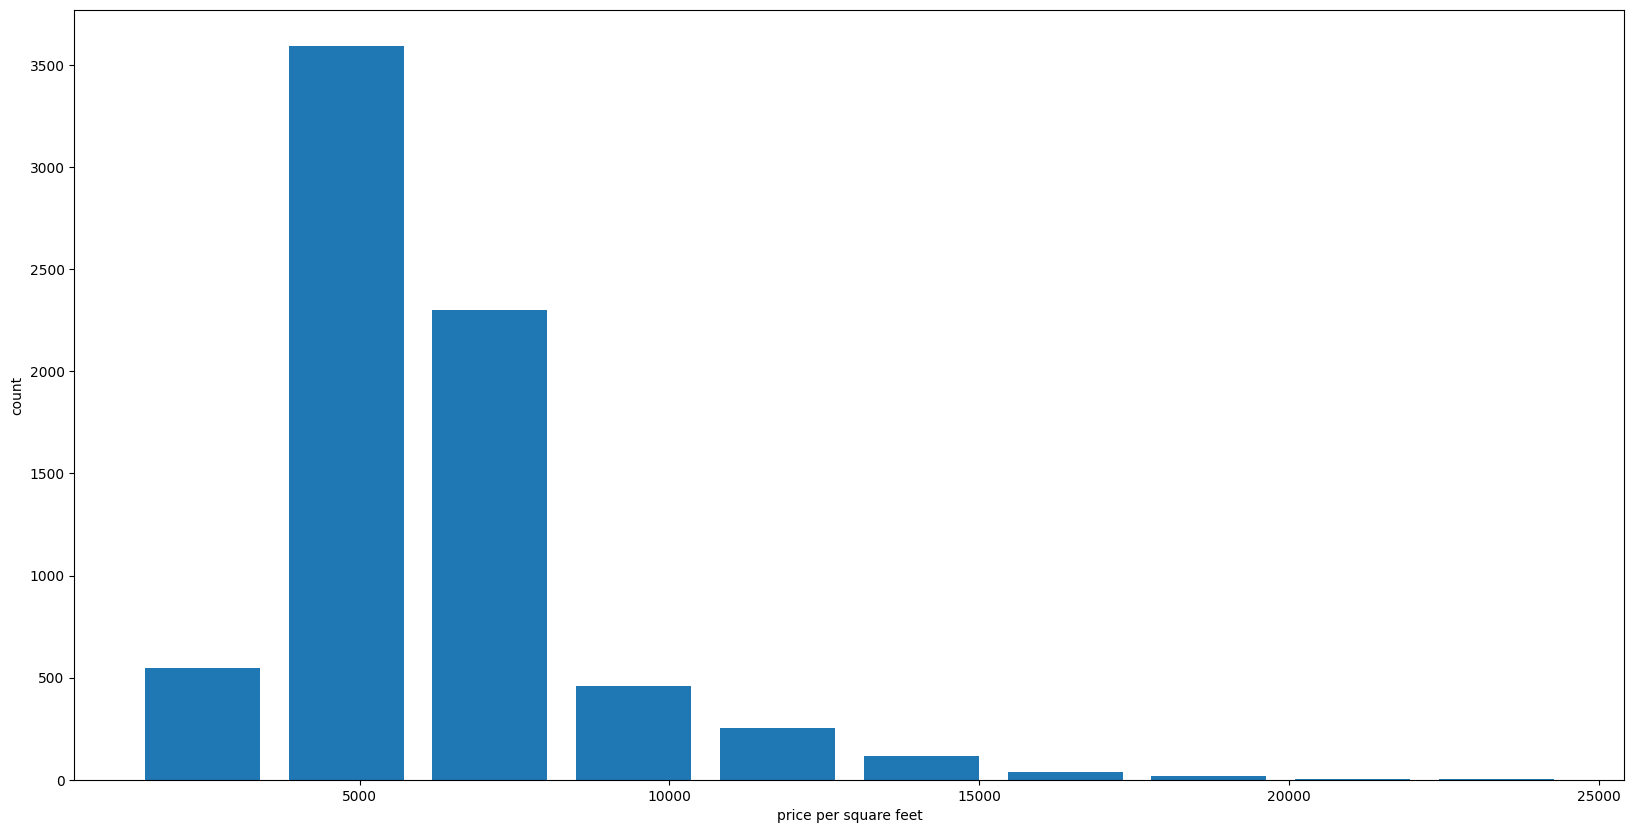

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel("count")

In [ ]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

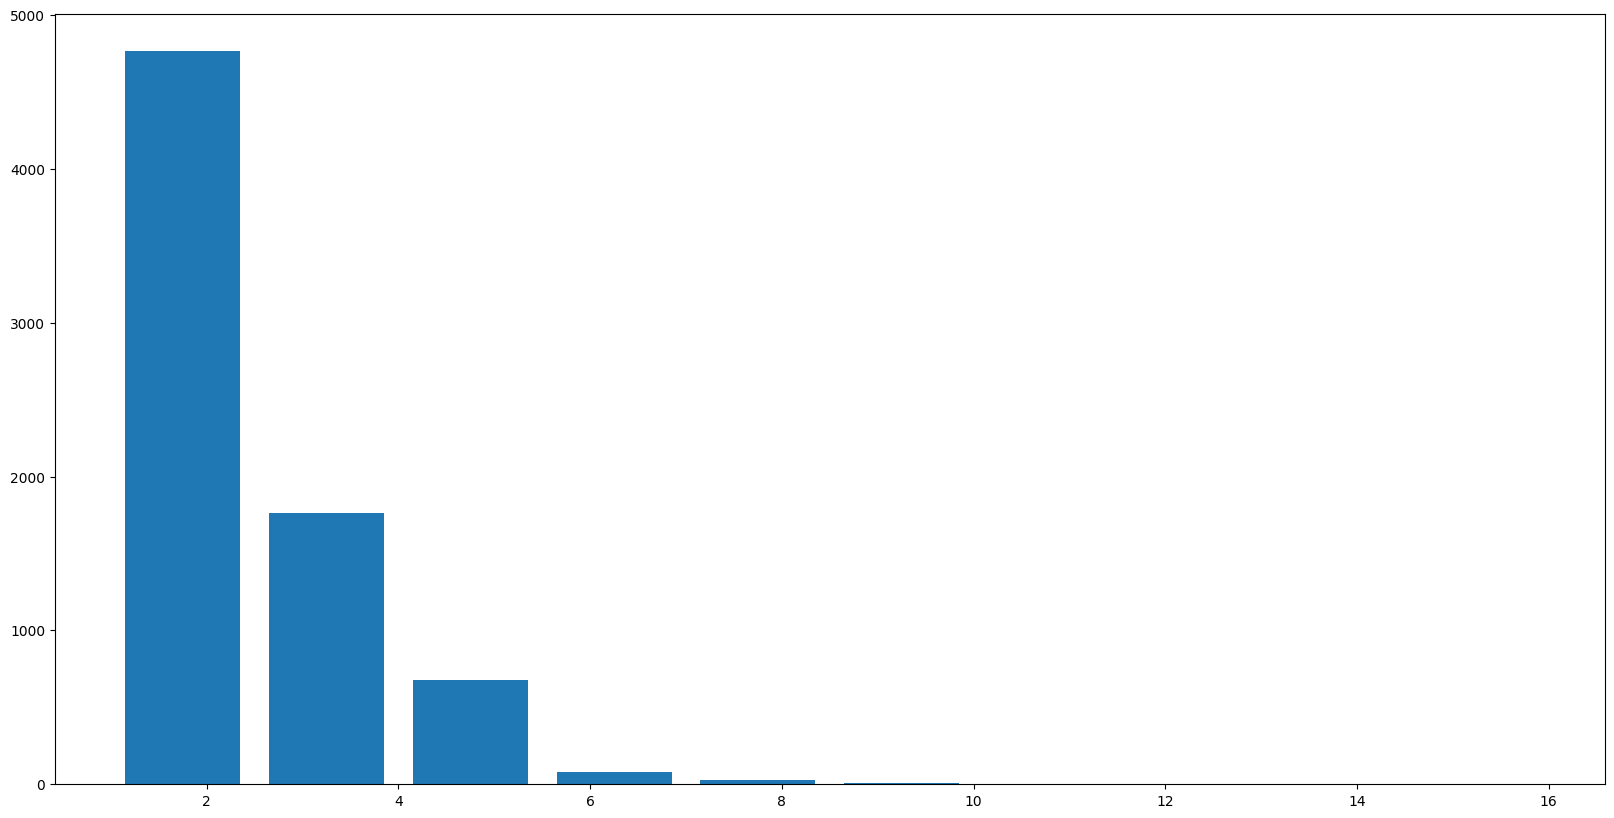

In [ ]:
plt.hist(df6.bath,rwidth=0.8)

In [ ]:
# no of bathrooms > no of bedrooms + 2 = is an outlier

In [ ]:
df6[df6.bath>df6.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df7 = df6[df6.bath<df6.BHK+2]

**Now we have to apply some machine learning Models**


so drop some unnecessary columns

In [ ]:
df8 = df7.drop(['size','price_per_sqft'],axis='columns')
df8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
len(df8.location.unique())

242

In [ ]:
# use pandas one-hot encoding

In [ ]:
dummies = pd.get_dummies(df8.location)
df8 = pd.concat([df8,dummies],axis='columns')
df8.drop(['location','other'],axis='columns',inplace=True)
df8.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df8.drop('price',axis='columns')
y = df8.price

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8452277697874376

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X, y,cv=cv)

***Let us find which model suits the best among all these***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def find_model_get_score(X,y):
  algo={
      'linear_regression':{
          'model':LinearRegression(),
          'params':{
              'fit_intercept': [True, False],

          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },
      'decision_tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion': ['mse','friedman_mse'],
              'splitter' : ['best', 'random']
          }
      },

  }


  scores=[]
  cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name , config in algo.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model':algo_name,
        'best_params':gs.best_params_,
        'best_score':gs.best_score_
    })

  return pd.DataFrame(scores,columns=['model','best_params','best_score'])

find_model_get_score(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_params,best_score
0,linear_regression,{'fit_intercept': False},0.819001
1,lasso,"{'alpha': 2, 'selection': 'random'}",0.687523
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.718330


In [ ]:
np.where(X.columns=='Electronic City Phase II')

(array([82]),)

In [ ]:
def predict_price(location,sqft,bath,bhk):
  loc_indx=np.where(X.columns==location)[0][0]
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_indx >=0:
    x[loc_indx] = 1

  return lr.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677206221

Model creation is done successfully done and now we have to export our model to a pickle file

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import pickle
with open('banglore_Home_prices_model.pickle','wb') as f:
  pickle.dump(lr,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))